# Dutch Corpora

In [8]:
# make sure installation has succeeded
import tempo_embeddings

In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
try:
    import google.colab

    IN_COLAB = True
except ModuleNotFoundError:
    IN_COLAB = False

## Load Database

In [11]:
%autoreload now

from pathlib import Path
from tqdm import tqdm
from tempo_embeddings.text.corpus import Corpus

In [12]:
from tempo_embeddings.embeddings.vector_database import ChromaDatabaseManager

MODEL_NAME = "NetherlandsForensicInstitute/robbert-2022-dutch-sentence-transformers"

db = ChromaDatabaseManager(db_path="testing_db", embedder_name=MODEL_NAME, batch_size=10)
db.connect()

collection_name = "anp_sg_corpus"

anp_sg_corpus = Corpus.from_chroma_db(db, collection_name=collection_name)

Retrieved existing collection 'anp_sg_corpus'
UMAP( verbose=True)
Thu Feb  8 11:27:53 2024 Construct fuzzy simplicial set
Thu Feb  8 11:27:54 2024 Finding Nearest Neighbors
Thu Feb  8 11:27:54 2024 Finished Nearest Neighbor Search
Thu Feb  8 11:27:54 2024 Construct embedding


Epochs completed:  49%| ████▉      247/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs


Epochs completed:  98%| █████████▊ 492/500 [00:01]

	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:01]

Thu Feb  8 11:27:55 2024 Finished embedding


In [13]:
for p in anp_sg_corpus.passages[:20]:
    print(len(p), p)

corpus = anp_sg_corpus

print(corpus.embeddings.shape)

203 Passage('zelf, want die bijen en andere bestuivers zijn eigenlijk kleine helpers van de landbouw. Dus als je op lange termijn wilt voorzien in gezond en duurzaam voedsel voor iedereen, dan is het niet zo heel erg', {'': '1110', 'RecId': 'h-tk-20172018-79-9', 'chamber': 'TweedeKamer', 'date': '2018-04-26', 'highlighting': '144_152', 'speakers': 'De voorzitter :|De heer Von Martels ( CDA ):|De voorzitter :|Mevrouw Ouwehand ( PvdD ):|De heer Von Martels ( CDA ):|Mevrouw Ouwehand ( PvdD ):|De heer Von Martels ( CDA ):|De heer Graus ( PVV ):|De heer Von Martels ( CDA ):|De voorzitter :|De heer Graus ( PVV ):|De voorzitter :|De heer Von Martels ( CDA ):|De voorzitter :|De heer Von Martels ( CDA ):|De voorzitter :|Mevrouw Kröger ( GroenLinks ):|De voorzitter :|Mevrouw Ouwehand ( PvdD ):|De voorzitter :|De heer Von Martels ( CDA ):|Mevrouw Ouwehand ( PvdD ):|De heer Von Martels ( CDA ):|Mevrouw Ouwehand ( PvdD ):|De voorzitter :|De heer Graus ( PVV ):|De voorzitter :|De heer Von Martels ( 

## Read Stopwords

In [14]:
!wget --continue https://raw.githubusercontent.com/Semantics-of-Sustainability/tempo-embeddings/main/tempo_embeddings/data/stopwords-filter-nl.txt

zsh:1: command not found: wget


In [15]:
stopwords_file = Path("stopwords-filter-nl.txt")

with open(stopwords_file.absolute(), "rt") as f:
    stopwords = set(f.read().splitlines())

stopwords.update(
    {
        "wij",
        "we",
        "moeten",
        "heer",
        "mevrouw",
        "minister",
        "voorzitter",
        "gaat",
        "wel",
        "den",
    }
)

## Cluster

In [16]:
%autoreload now

# Arguments: min_cluster_size=10, cluster_selection_epsilon=0.1, ...
# See https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html for full list

# e.g. min_samples=10, cluster_selection_epsilon=0.2, cluster_selection_method="leaf"
FILTER_TERMS = ["duurzaam"] 
clusters = corpus.cluster(min_cluster_size=10, cluster_selection_epsilon=0.1)
print(clusters)

[Subcorpus(-1, [0, 2, 3, 11, 14, 15, 22, 29, 31, 32]), Subcorpus(23, [1, 76, 197, 272, 306, 427, 439, 447, 624, 630]), Subcorpus(32, [4, 28, 40, 139, 149, 160, 170, 192, 225, 243]), Subcorpus(17, [5, 129, 183, 322, 380, 397, 445, 451, 481, 482]), Subcorpus(26, [6, 193, 224, 241, 261, 354, 425, 546, 556, 572]), Subcorpus(31, [7, 17, 18, 83, 93, 95, 96, 108, 118, 122]), Subcorpus(24, [8, 152, 205, 361, 640, 687, 691, 1215, 1455, 1498]), Subcorpus(19, [9, 24, 89, 111, 148, 277, 335, 355, 358, 365]), Subcorpus(12, [10, 21, 46, 47, 55, 66, 69, 87, 94, 134]), Subcorpus(6, [12, 59, 60, 163, 180, 275, 320, 328, 344, 362]), Subcorpus(11, [13, 86, 221, 230, 461, 622, 642, 667, 674, 738]), Subcorpus(16, [16, 120, 131, 258, 418, 913, 916, 1012, 1086, 1104]), Subcorpus(8, [19, 25, 35, 99, 145, 165, 172, 178, 214, 233]), Subcorpus(28, [20, 63, 115, 126, 264, 342, 491, 627, 629, 790]), Subcorpus(25, [23, 102, 124, 133, 135, 181, 293, 606, 659, 750]), Subcorpus(5, [26, 765, 771, 807, 971, 990, 1056, 1

In [17]:
for cluster in clusters:
    cluster.set_topic_label(exclude_words=frozenset(stopwords | set(FILTER_TERMS)), n=5)
    print(cluster)

Subcorpus('Outliers', [0, 2, 3, 11, 14, 15, 22, 29, 31, 32])
Subcorpus('graus; duurzaamheid; goede; beleidsregel; mededinging', [1, 76, 197, 272, 306, 427, 439, 447, 624, 630])
Subcorpus('duurzaamheid; eigenlijk; nederland; krijgen; pvv', [4, 28, 40, 139, 149, 160, 170, 192, 225, 243])
Subcorpus('twijfels; uitwerken; betrokken; absoluut; hoop', [5, 129, 183, 322, 380, 397, 445, 451, 481, 482])
Subcorpus('inkopen; motie; project; houd; toezegt', [6, 193, 224, 241, 261, 354, 425, 546, 556, 572])
Subcorpus('duurzaamheid; heel; komen; geld; regering', [7, 17, 18, 83, 93, 95, 96, 108, 118, 122])
Subcorpus('21501; dierenwelzijn; echter; duurzaamheid; regelgeving', [8, 152, 205, 361, 640, 687, 691, 1215, 1455, 1498])
Subcorpus('energie; biomassa; meest; duurzame; opgesteld', [9, 24, 89, 111, 148, 277, 335, 355, 358, 365])
Subcorpus('nederland; monitor; duurzaamheid; euro; nederlandse', [10, 21, 46, 47, 55, 66, 69, 87, 94, 134])
Subcorpus('verduurzaamd; woningen; duurzaamheid; publieke; 000', 

/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
with open("clusters.txt", "wt") as f:
    for cluster in clusters:
        print(
            ", ".join(
                cluster.top_words(
                    exclude_words=frozenset(stopwords | set(FILTER_TERMS)), n=5
                )
            ),
            file=f,
        )

# Visualize Embeddings

<Axes: xlabel='x', ylabel='y'>

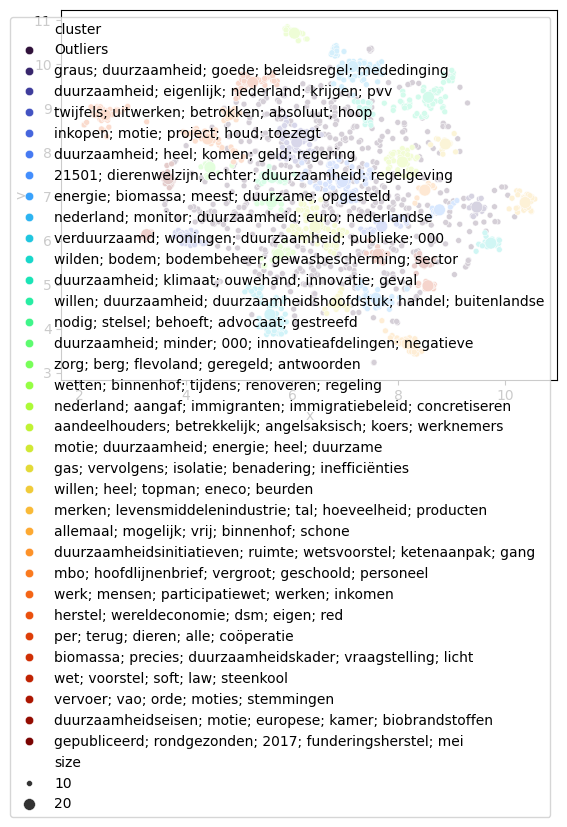

In [19]:
%autoreload now

from tempo_embeddings.visualization.clusters import ClusterVisualizer

visualizer = ClusterVisualizer(*clusters)
visualizer.visualize()

In [20]:
import os
from bokeh.io import output_notebook
from bokeh.plotting import show
from tempo_embeddings.visualization.bokeh import BokehInteractiveVisualizer


output_notebook()

visualizer = BokehInteractiveVisualizer(
    *clusters, metadata_fields=corpus.metadata_fields(), width=2000, height=1000
)

os.environ[
    "BOKEH_ALLOW_WS_ORIGIN"
] = "*"

show(visualizer.create_document)

Loading BokehJS ...